<a href="https://colab.research.google.com/github/NuraySultan/test/blob/main/cryptanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

df = pd.read_csv('Top10-2021-2024-1d.csv')
print(df.head())

    timestamp   BTCUSDT  ETHUSDT  BNBUSDT  SOLUSDT  USDCUSDT  XRPUSDT  \
0  2021-01-01  29331.69   728.91  37.7762   1.8421    0.9974  0.23746   
1  2021-01-02  32178.33   774.56  38.2331   1.7999    0.9989  0.22064   
2  2021-01-03  33000.05   978.28  41.2575   2.1779    0.9992  0.22540   
3  2021-01-04  31988.71  1041.43  41.1333   2.4909    0.9994  0.23565   
4  2021-01-05  33949.53  1099.56  41.8219   2.1636    0.9969  0.22573   

   DOGEUSDT  ADAUSDT  SHIBUSDT  
0  0.005680  0.17509       NaN  
1  0.010526  0.17742       NaN  
2  0.009821  0.20615       NaN  
3  0.009761  0.22528       NaN  
4  0.009970  0.25873       NaN  


In [34]:
#removing unnecessary columns
df.drop(columns=['USDCUSDT','BNBUSDT', 'DOGEUSDT', 'ADAUSDT', 'SHIBUSDT'], inplace=True)
print(df.head())

    timestamp   BTCUSDT  ETHUSDT  SOLUSDT  XRPUSDT
0  2021-01-01  29331.69   728.91   1.8421  0.23746
1  2021-01-02  32178.33   774.56   1.7999  0.22064
2  2021-01-03  33000.05   978.28   2.1779  0.22540
3  2021-01-04  31988.71  1041.43   2.4909  0.23565
4  2021-01-05  33949.53  1099.56   2.1636  0.22573


In [35]:
#checking data type and editing type
df.info()
df['timestamp'] = pd.to_datetime(df['timestamp'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1096 non-null   object 
 1   BTCUSDT    1096 non-null   float64
 2   ETHUSDT    1096 non-null   float64
 3   SOLUSDT    1096 non-null   float64
 4   XRPUSDT    1096 non-null   float64
dtypes: float64(4), object(1)
memory usage: 42.9+ KB


In [36]:
#checking nulls

df.isna().sum()

,0
timestamp,0
BTCUSDT,0
ETHUSDT,0
SOLUSDT,0
XRPUSDT,0


In [41]:
#checking duplicates
print(df.duplicated().sum())
print(df['timestamp'].duplicated().sum())

0
0


In [46]:
#checking dates

print(df['timestamp'].min())
print(df['timestamp'].max())

2021-01-01 00:00:00
2024-01-01 00:00:00


PART 2

In [56]:
df.set_index('timestamp',inplace=True)
df.sort_values(by=['timestamp'])

,BTCUSDT,ETHUSDT,SOLUSDT,XRPUSDT
timestamp,,,,
2021-01-01,29331.69,728.91,1.8421,0.23746
2021-01-02,32178.33,774.56,1.7999,0.22064
2021-01-03,33000.05,978.28,2.1779,0.22540
2021-01-04,31988.71,1041.43,2.4909,0.23565
2021-01-05,33949.53,1099.56,2.1636,0.22573
...,...,...,...,...
2023-12-28,42563.76,2344.15,101.8000,0.63460
2023-12-29,42066.95,2299.20,106.1700,0.62300
2023-12-30,42140.28,2291.68,101.9000,0.62070


In [57]:
df_raw = df.copy()

PART 3 DATA ANALYSIS

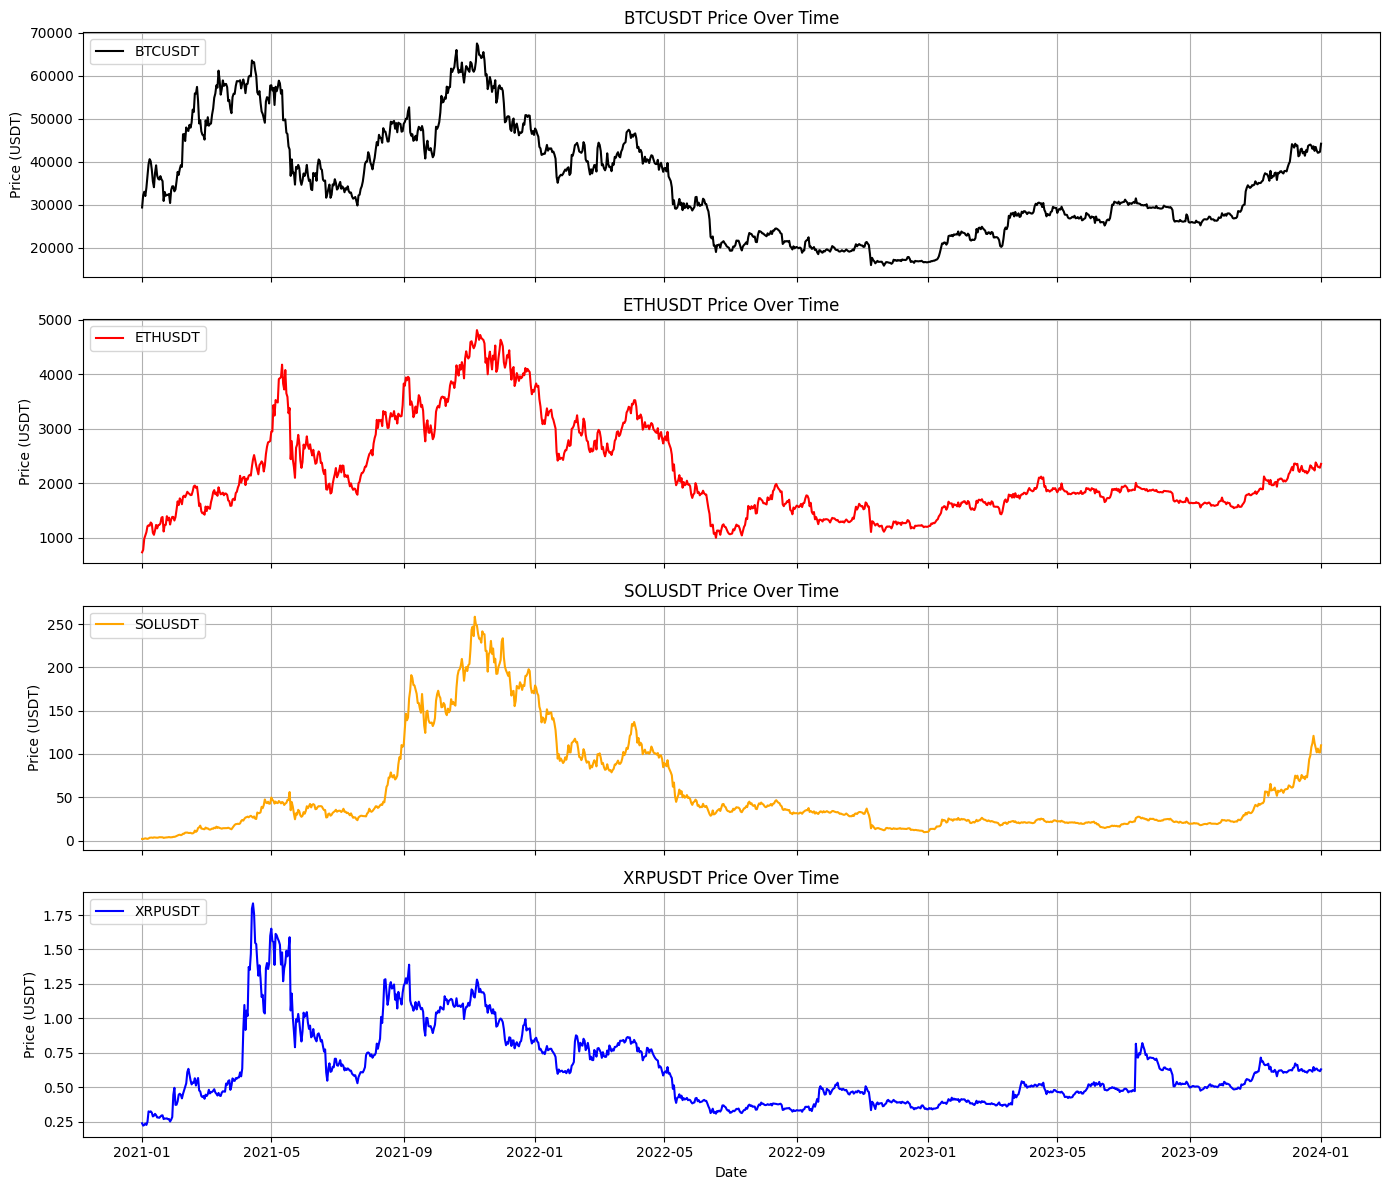

In [61]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

coins = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'XRPUSDT']
colors = ['black', 'red', 'orange', 'blue']


for i, coin in enumerate(coins):
    axs[i].plot(df.index, df[coin], label=coin, color=colors[i])
    axs[i].set_title(f'{coin} Price Over Time')
    axs[i].set_ylabel('Price (USDT)')
    axs[i].grid(True)
    axs[i].legend(loc='upper left')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [66]:
#Checking correlation

returns = df.pct_change() #daily percatange change
correlation_matrix = returns.corr()
print(correlation_matrix)

          BTCUSDT   ETHUSDT   SOLUSDT   XRPUSDT
BTCUSDT  1.000000  0.813712  0.553286  0.558601
ETHUSDT  0.813712  1.000000  0.614885  0.565755
SOLUSDT  0.553286  0.614885  1.000000  0.450723
XRPUSDT  0.558601  0.565755  0.450723  1.000000


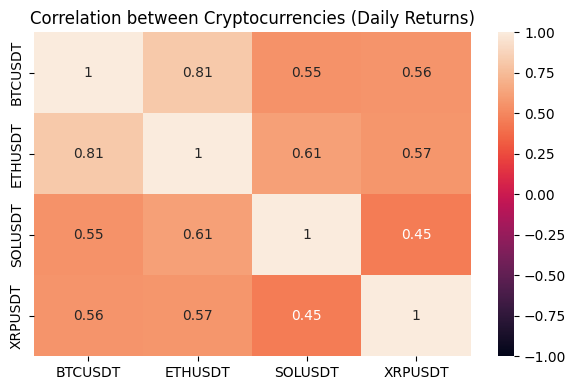

In [72]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Cryptocurrencies (Daily Returns)')
plt.tight_layout()
plt.show()

PART 5

In [82]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c6f1736f8c7ef7c70ff825fc493d1006500a861ec5c5da9c0a8c4964ef97162e
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [87]:
import ta


,BTCUSDT,ETHUSDT,SOLUSDT,XRPUSDT,rsi,sma_14,macd,macd_signal,macd_diff,bb_width
timestamp,,,,,,,,,,
2023-12-28,42563.76,2344.15,101.80,0.6346,52.678551,42914.133571,833.293046,1078.714285,-245.421239,7.949435
2023-12-29,42066.95,2299.20,106.17,0.6230,50.068665,42923.180000,699.971599,1002.965748,-302.994149,7.887914
2023-12-30,42140.28,2291.68,101.90,0.6207,50.458814,42913.340714,593.390275,921.050653,-327.660378,7.678606
2023-12-31,42283.58,2281.87,101.72,0.6156,51.260287,42978.264286,514.555446,839.751612,-325.196166,7.095081
2024-01-01,44179.55,2352.04,109.91,0.6294,60.390688,43086.960714,598.171856,791.435661,-193.263804,7.130781


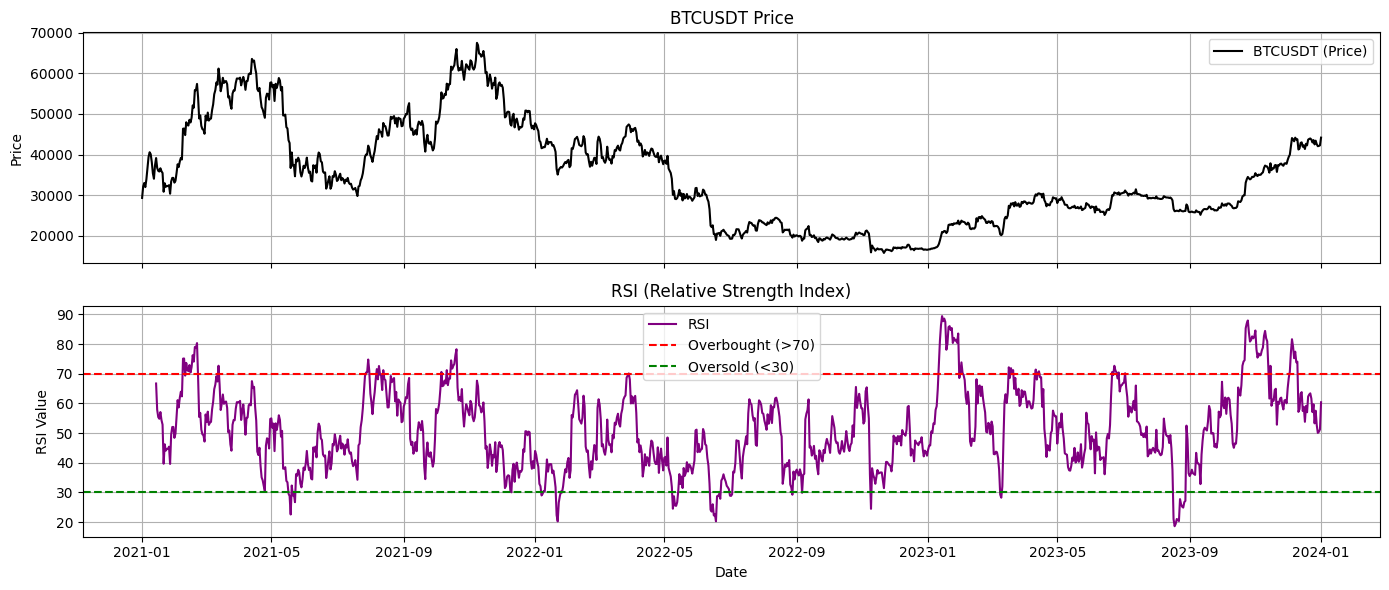

In [93]:
# RSI (Relative Strength Index)
df['rsi'] = ta.momentum.RSIIndicator(close=df['BTCUSDT']).rsi()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# Price plot
ax1.plot(df.index, df['BTCUSDT'], label='BTCUSDT (Price)', color='black')
ax1.set_title('BTCUSDT Price')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# RSI plot
ax2.plot(df.index, df['rsi'], label='RSI', color='purple')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (>70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (<30)')
ax2.set_title('RSI (Relative Strength Index)')
ax2.set_ylabel('RSI Value')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [94]:

# SMA (Simple Moving Average) — 14-дневная
df['sma_14'] = ta.trend.SMAIndicator(close=df['BTCUSDT'], window=14).sma_indicator()

# MACD
macd = ta.trend.MACD(close=df['BTCUSDT'])
df['macd'] = macd.macd()
df['macd_signal'] = macd.macd_signal()
df['macd_diff'] = macd.macd_diff()

# Bollinger Bands — ширина канала
bb = ta.volatility.BollingerBands(close=df['BTCUSDT'])
df['bb_width'] = bb.bollinger_wband()


df.tail()

,BTCUSDT,ETHUSDT,SOLUSDT,XRPUSDT,rsi,sma_14,macd,macd_signal,macd_diff,bb_width,target
timestamp,,,,,,,,,,,
2023-12-28,42563.76,2344.15,101.80,0.6346,52.678551,42914.133571,833.293046,1078.714285,-245.421239,7.949435,0
2023-12-29,42066.95,2299.20,106.17,0.6230,50.068665,42923.180000,699.971599,1002.965748,-302.994149,7.887914,1
2023-12-30,42140.28,2291.68,101.90,0.6207,50.458814,42913.340714,593.390275,921.050653,-327.660378,7.678606,1
2023-12-31,42283.58,2281.87,101.72,0.6156,51.260287,42978.264286,514.555446,839.751612,-325.196166,7.095081,1
2024-01-01,44179.55,2352.04,109.91,0.6294,60.390688,43086.960714,598.171856,791.435661,-193.263804,7.130781,0


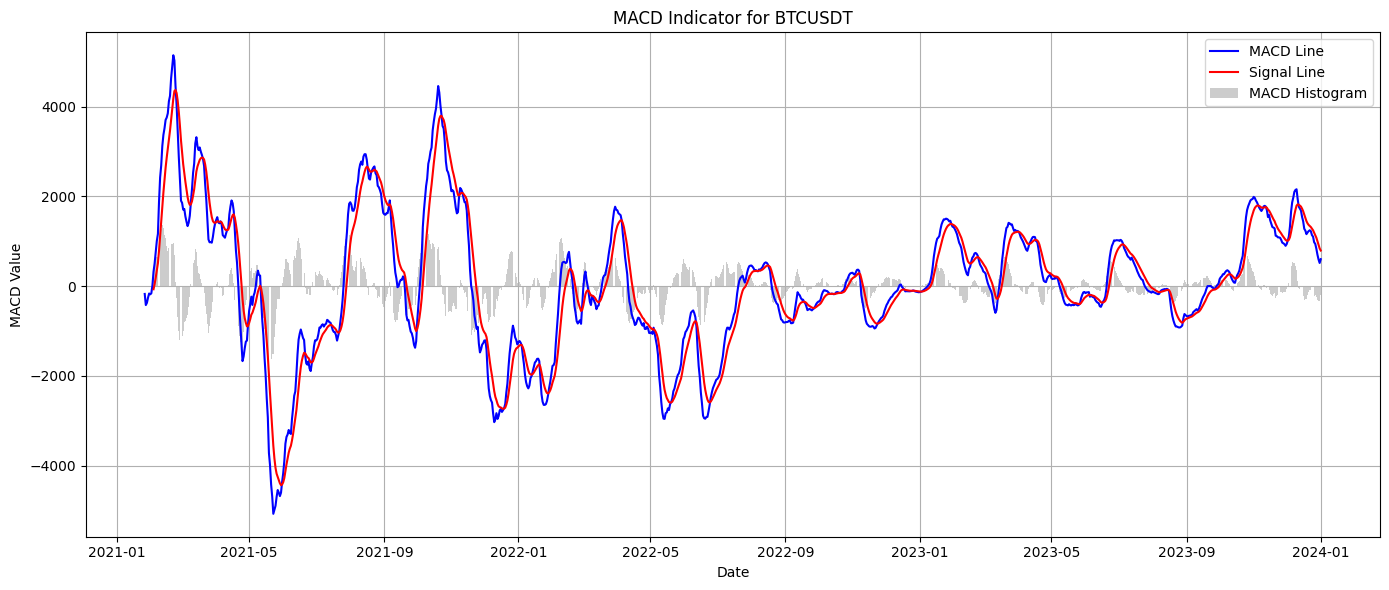

In [95]:
plt.figure(figsize=(14, 6))

# Линии MACD и сигнальная
plt.plot(df.index, df['macd'], label='MACD Line', color='blue')
plt.plot(df.index, df['macd_signal'], label='Signal Line', color='red')

# Гистограмма (разность между ними)
plt.bar(df.index, df['macd_diff'], label='MACD Histogram', color='gray', alpha=0.4)

plt.title('MACD Indicator for BTCUSDT')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

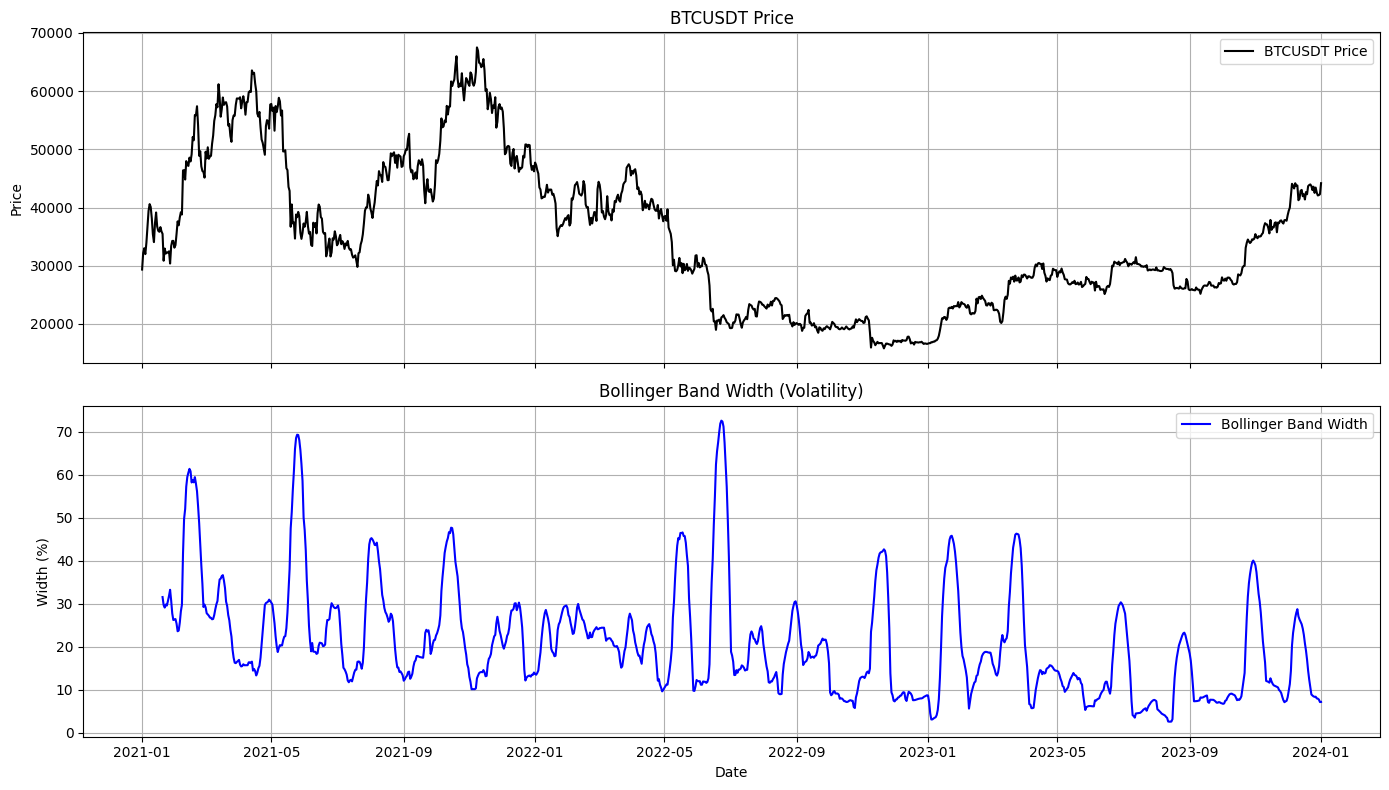

In [96]:
# Построим 2 графика: цена и ширина канала Bollinger Bands
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# График цены BTCUSDT
ax1.plot(df.index, df['BTCUSDT'], label='BTCUSDT Price', color='black')
ax1.set_title('BTCUSDT Price')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.legend()

# График ширины канала Bollinger Bands
ax2.plot(df.index, df['bb_width'], label='Bollinger Band Width', color='blue')
ax2.set_title('Bollinger Band Width (Volatility)')
ax2.set_ylabel('Width (%)')
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [88]:
df['target'] = (df['BTCUSDT'].shift(-1) > df['BTCUSDT']).astype(int)
df['target'].value_counts(normalize=True)


,proportion
target,
0,0.511861
1,0.488139


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC-AUC Score: 0.5191


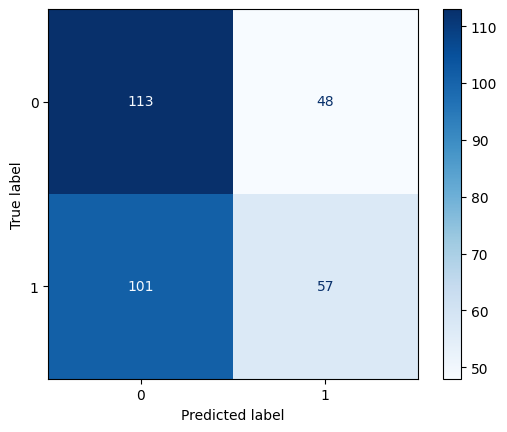

In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 🔹 Выбираем фичи и целевую переменную
features = df[['rsi', 'sma_14', 'macd', 'macd_signal', 'macd_diff', 'bb_width']]
target = df['target']

# Удаляем строки с NaN (например, в RSI первые 14 дней)
features = features.dropna()
target = target[features.index]

# 🔹 Делим на train и test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, shuffle=False)

# 🔹 Масштабируем фичи (XGBoost не требует, но пригодится для визуализаций)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Обучаем модель
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# 🔹 Предсказываем и оцениваем
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC Score: {roc_score:.4f}")

# 🔹 Конфьюжн матрица
y_pred = model.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
